In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.fft import fft

In [2]:
# tickers = BBDC4.SA (stocks), indices = ^BVSP, ^GSPC
ticker = "BBDC4.SA"
ticker2 = "^BVSP"
dias_passados = 20

# captura de dados  
data = yf.download(ticker, start="2013-01-01", end="2023-10-10")
data2 = yf.download(ticker2,  start="2013-01-01", end="2023-10-10")
data = data.reindex(data2.index)
data['Adj Close'] = data2['Adj Close'] / data['Adj Close']
data['Past Days'] = data['Adj Close'].shift(dias_passados)

# tratamento dos dados de retorno
preco_hoje = np.array(data['Adj Close'])
preco_passado = np.array(data['Past Days']) 
data['Past Return'] = np.log(preco_hoje / preco_passado)
data = data.dropna()
print(data.head(20))

time_series = np.array(data['Past Return'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close    Adj Close    Volume  \
Date                                                                            
2013-01-31  12.757680  13.074841  12.732735  13.042768  7304.576185  18947703   
2013-02-01  12.957242  13.067714  12.828952  12.967933  7419.261143  15551136   
2013-02-04  12.900224  12.960806  12.647209  12.793316  7419.735245  17388044   
2013-02-05  12.761244  13.106913  12.586628  12.754117  7426.173868  23595534   
2013-02-06  12.775498  12.811134  12.436957  12.543865  7472.596078  16412064   
2013-02-07  12.561683  12.682845  12.312231  12.436957  7462.809939  29196614   
2013-02-08  12.444084  12.739863  12.337176  12.686409  7331.857451  20198405   
2013-02-13  12.793316  12.800444  12.575937  12.575937  7384.628742  15161642   
2013-02-14  12.568810  12.572373  12.337176  12.4084

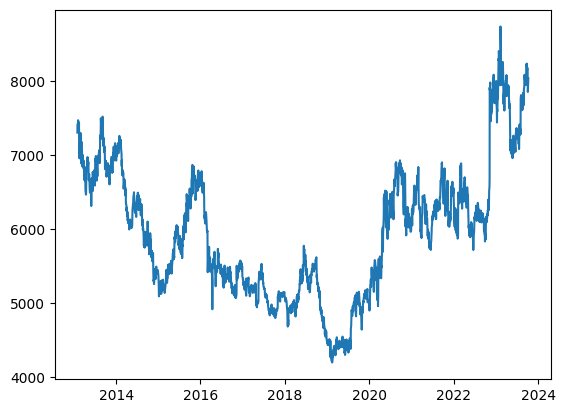

In [3]:
plt.plot(data['Adj Close'])

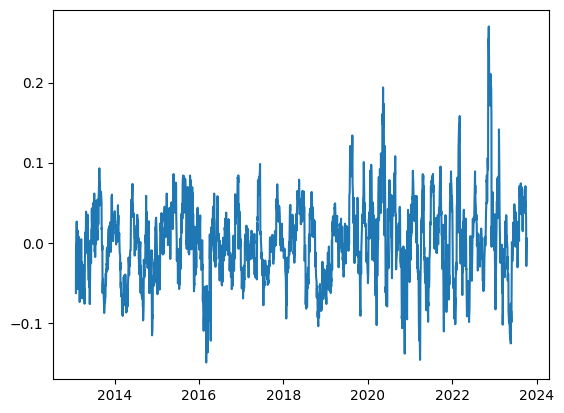

In [4]:
plt.plot(data['Past Return'])

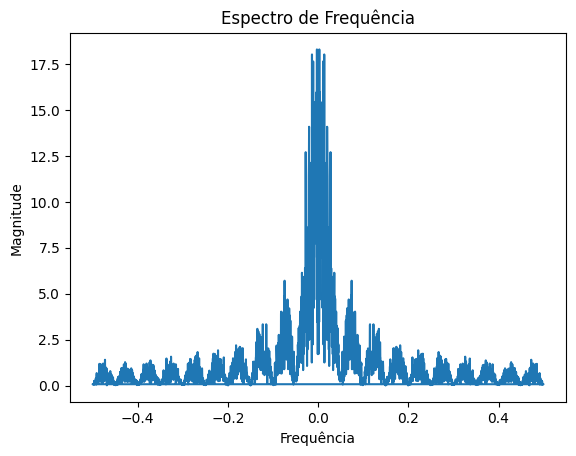

In [5]:
def decompose_time_series(time_series):
    # Calcula a FFT da série temporal
    fft_result = np.fft.fft(time_series)

    # Calcula as frequências correspondentes
    freq = np.fft.fftfreq(len(time_series))

    # Retorna o resultado da FFT e as frequências
    return fft_result, freq

# Exemplo de uso da função
fft_result, freq = decompose_time_series(time_series)
# Plotar o espectro de frequência
plt.plot(freq, np.abs(fft_result))
plt.title("Espectro de Frequência")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")
plt.show()


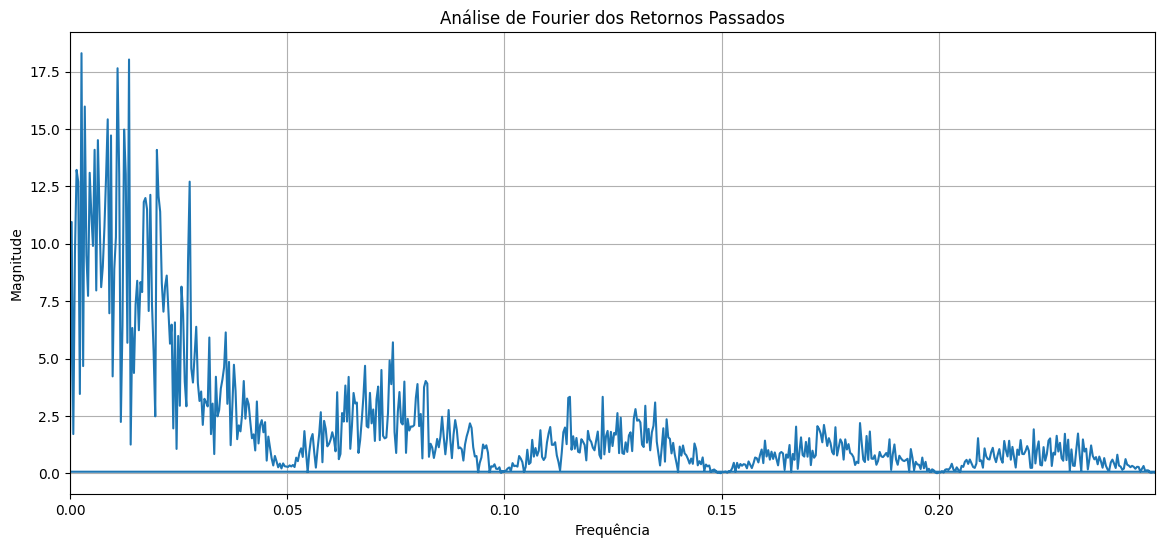

In [6]:
# Convertendo a coluna "Past Return" para um array NumPy antes de aplicar a FFT
past_return_array = data['Past Return'].to_numpy()

# Realizando a Transformada Rápida de Fourier (FFT) novamente
fft_values = fft(past_return_array)
frequencies = np.fft.fftfreq(len(fft_values))
magnitude = np.abs(fft_values)

# Preparando o gráfico
plt.figure(figsize=(14, 6))
plt.plot(frequencies, magnitude)
plt.title('Análise de Fourier dos Retornos Passados')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid(True)

# Mostrando apenas frequências positivas
plt.xlim([0, max(frequencies)/2])

plt.show()

In [7]:
print(len(magnitude))
print(len(frequencies))
print(len(past_return_array))
frequencies[100:200]

data['Magnitude'] = magnitude
data['Frequencia'] = frequencies
data['Retorno passado'] = past_return_array

data.head(10)

2650
2650
2650


,Open,High,Low,Close,Adj Close,Volume,Past Days,Past Return,Magnitude,Frequencia,Retorno passado
Date,,,,,,,,,,,
2013-01-31,12.757680,13.074841,12.732735,13.042768,7304.576185,18947703,7778.862572,-0.062909,1.808677,0.000000,-0.062909
2013-02-01,12.957242,13.067714,12.828952,12.967933,7419.261143,15551136,7430.044064,-0.001452,10.946654,0.000377,-0.001452
2013-02-04,12.900224,12.960806,12.647209,12.793316,7419.735245,17388044,7462.741538,-0.005779,1.711827,0.000755,-0.005779
2013-02-05,12.761244,13.106913,12.586628,12.754117,7426.173868,23595534,7429.989300,-0.000514,9.592542,0.001132,-0.000514
2013-02-06,12.775498,12.811134,12.436957,12.543865,7472.596078,16412064,7307.943781,0.022281,13.216580,0.001509,0.022281
2013-02-07,12.561683,12.682845,12.312231,12.436957,7462.809939,29196614,7268.618259,0.026366,12.691334,0.001887,0.026366
2013-02-08,12.444084,12.739863,12.337176,12.686409,7331.857451,20198405,7377.639565,-0.006225,3.458206,0.002264,-0.006225
2013-02-13,12.793316,12.800444,12.575937,12.575937,7384.628742,15161642,7381.648282,0.000404,18.297199,0.002642,0.000404
2013-02-14,12.568810,12.572373,12.337176,12.408448,7442.147563,15022176,7327.872979,0.015474,4.672155,0.003019,0.015474


In [8]:
# IDEIA DE duas estratégias:

# . contra tendencia: locais de baixa frenquencia pontos de retorno a alta frequencia
# . tendencia: rompendo valores de baixa frenquencia, tende a migrar para alta frenquencia
# . o que podemos inferir baseados nisso? 

In [9]:
# captura de dados  
data = yf.download(ticker, start="2013-01-01", end="2023-10-10")
data['Past Days'] = data['Adj Close'].shift(dias_passados)

# tratamento dos dados de retorno
preco_hoje = np.array(data['Adj Close'])
preco_passado = np.array(data['Past Days']) 
data['Past Return'] = np.log(preco_hoje / preco_passado)
data = data.dropna()
time_series = np.array(data['Past Return'])

[*********************100%%**********************]  1 of 1 completed


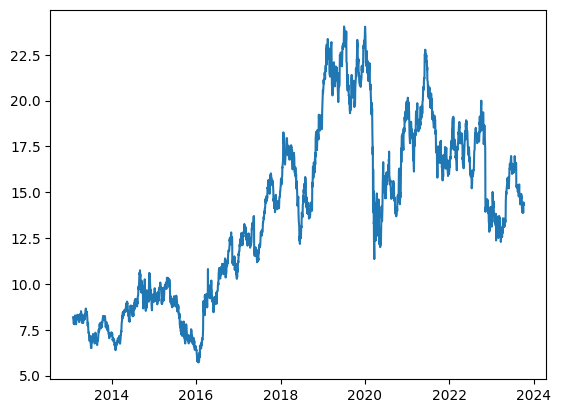

In [10]:
plt.plot(data['Adj Close'])

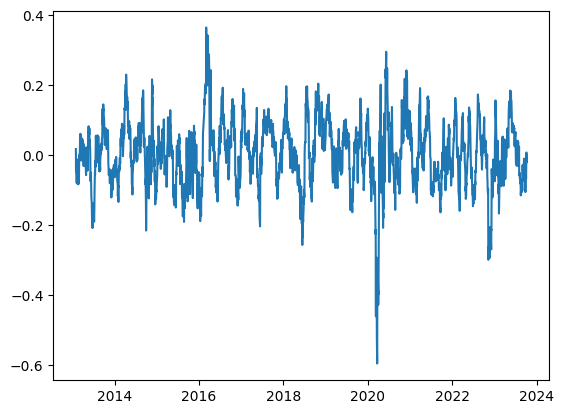

In [11]:
plt.plot(data['Past Return'])

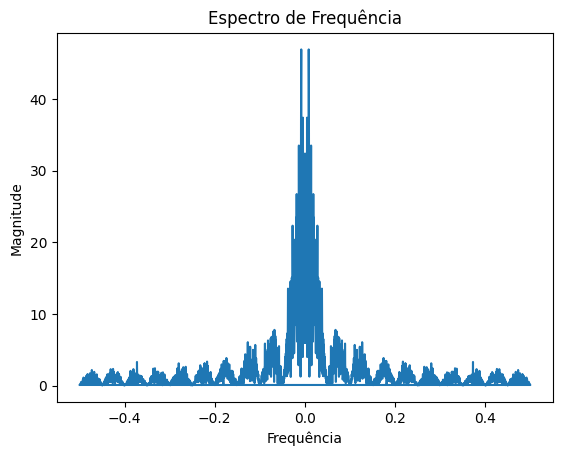

In [22]:
def decompose_time_series(time_series):
    # Calcula a FFT da série temporal
    fft_result = np.fft.fft(time_series)

    # Calcula as frequências correspondentes
    freq = np.fft.fftfreq(len(time_series))

    # Retorna o resultado da FFT e as frequências
    return fft_result, freq

# Exemplo de uso da função
fft_result, freq = decompose_time_series(time_series)
# Plotar o espectro de frequência
plt.plot(freq, np.abs(fft_result))
plt.title("Espectro de Frequência")
plt.xlabel("Frequência")
plt.ylabel("Magnitude")
plt.show()


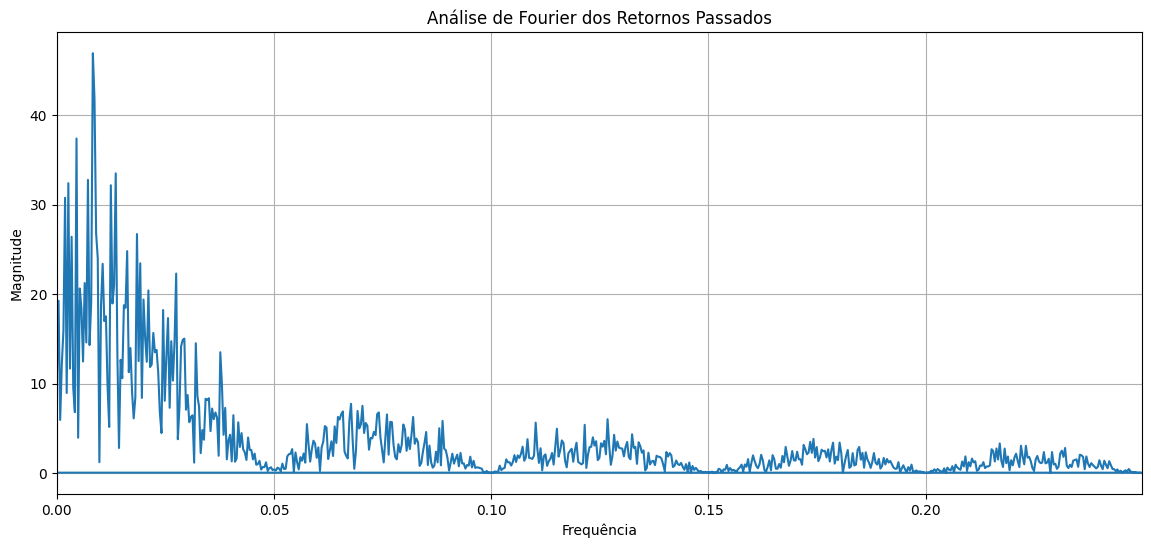

In [13]:
# Convertendo a coluna "Past Return" para um array NumPy antes de aplicar a FFT
past_return_array = data['Past Return'].to_numpy()

# Realizando a Transformada Rápida de Fourier (FFT) novamente
fft_values = fft(past_return_array)
frequencies = np.fft.fftfreq(len(fft_values))
magnitude = np.abs(fft_values)

# Preparando o gráfico
plt.figure(figsize=(14, 6))
plt.plot(frequencies, magnitude)
plt.title('Análise de Fourier dos Retornos Passados')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid(True)

# Mostrando apenas frequências positivas
plt.xlim([0, max(frequencies)/2])

plt.show()

In [14]:
x = np.zeros(100)

for i in range(100):
    x[i] = i

In [15]:
def calculate_fft_metrics(data, window_size):
    """
    Calcula a frequência e magnitude predominantes usando FFT em janelas deslizantes do conjunto de dados.
    
    :param data: Series de Pandas com os dados de Past Return.
    :param window_size: Tamanho da janela para a FFT.
    :return: DataFrame com a frequência e magnitude predominantes para cada janela, e a média dos Past Returns.
    """
    # Inicializa listas para armazenar os resultados
    dominant_frequencies = []
    dominant_magnitudes = []
    average_returns = []

    # Loop pelas janelas deslizantes do conjunto de dados
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]

        # Calcula FFT
        fft_values = fft(window)
        frequencies = np.fft.fftfreq(len(fft_values))
        # magnitude = np.abs(fft_values)
        magnitude = np.array(fft_values)

        # Encontra a frequência dominante (ignorando a frequência zero)
        non_zero_indices = np.where(frequencies > 0)
        dominant_frequency = frequencies[non_zero_indices][np.argmax(magnitude[non_zero_indices])]
        dominant_magnitude = np.max(magnitude[non_zero_indices])

        # Armazena os resultados
        dominant_frequencies.append(dominant_frequency)
        dominant_magnitudes.append(dominant_magnitude)
        average_returns.append(window.mean())

    # Cria um DataFrame com os resultados
    results_df = pd.DataFrame({
        'Dominant Frequency': dominant_frequencies,
        'Dominant Magnitude': dominant_magnitudes,
        'Average Past Return': average_returns
    })

    return results_df


In [16]:
# Definindo o tamanho da janela para a FFT
window_size = 21  # Exemplo de tamanho de janela

# Calculando as métricas de FFT
fft_results = calculate_fft_metrics(time_series, window_size)

# Visualizando as primeiras linhas do DataFrame resultante
fft_results.head()

,Dominant Frequency,Dominant Magnitude,Average Past Return
0,0.095238,0.218831+0.160206j,-0.045199
1,0.047619,0.163609+0.066597j,-0.046097
2,0.047619,0.190678+0.128510j,-0.043408
3,0.047619,0.207185+0.198392j,-0.040276
4,0.047619,0.228384+0.278063j,-0.035846


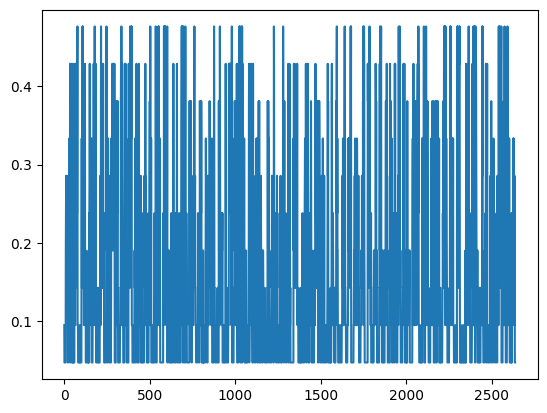

In [17]:
array_frequencia = np.array(fft_results['Dominant Frequency'])
plt.plot(array_frequencia)

/Users/gabrielassuncao/CARTOR/quant/quant_research_2023/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/gabrielassuncao/CARTOR/quant/quant_research_2023/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


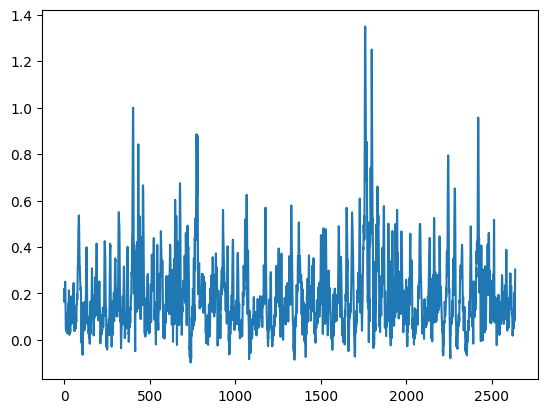

In [18]:
array_magnitude = np.array(fft_results['Dominant Magnitude'])
plt.plot(array_magnitude)

In [34]:
print(len(time_series[20:]))
print(len(array_frequencia))
print(len(array_magnitude))
dados_brutos = time_series[20:]

2638
2638
2638


In [38]:
import math

print(math.cos(dados_brutos[100]))
print(math.sin(dados_brutos[100]))
print(dados_brutos[100])

0.9996826262248992
0.025192197682781303
0.025194863135456172


In [36]:
print(dados_brutos[100])
print(array_frequencia[100])
print(array_magnitude[100])

0.025194863135456172
0.047619047619047616
(0.017860479448757335+1.088763361182189j)


In [37]:
array_magnitude[0]
type(array_magnitude[0])

numpy.complex128